<a href="https://colab.research.google.com/github/viniciusninatinatania-collab/Projeto_Big_Data/blob/main/trabalho_bigdate_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Chamando as bibliotecas para a analisar e ter a visualização do banco de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib.patches import Patch


#Invocando o arquivo que está no drive e o arquivo está armazenado no modo excel
tabela = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/arquvio_tratado.xlsx')

# **Faturamento Total**

In [2]:
# Agrupamento e soma do faturamento total por loja
faturamento_total_por_loja = (
    tabela[['local_loja', 'valor_total']]        # seleciona colunas relevantes
    .groupby('local_loja')                       # agrupa por loja
    .sum()                                       # soma o faturamento de cada loja
    .sort_values(by='valor_total', ascending=False)  # ordena do maior para o menor
)

# Exibe o resultado final: faturamento total por loja
faturamento_total_por_loja

,valor_total
local_loja,
Hell's Kitchen,236511.17
Astoria,232243.91
Lower Manhattan,230057.25


/tmp/ipython-input-1164079609.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


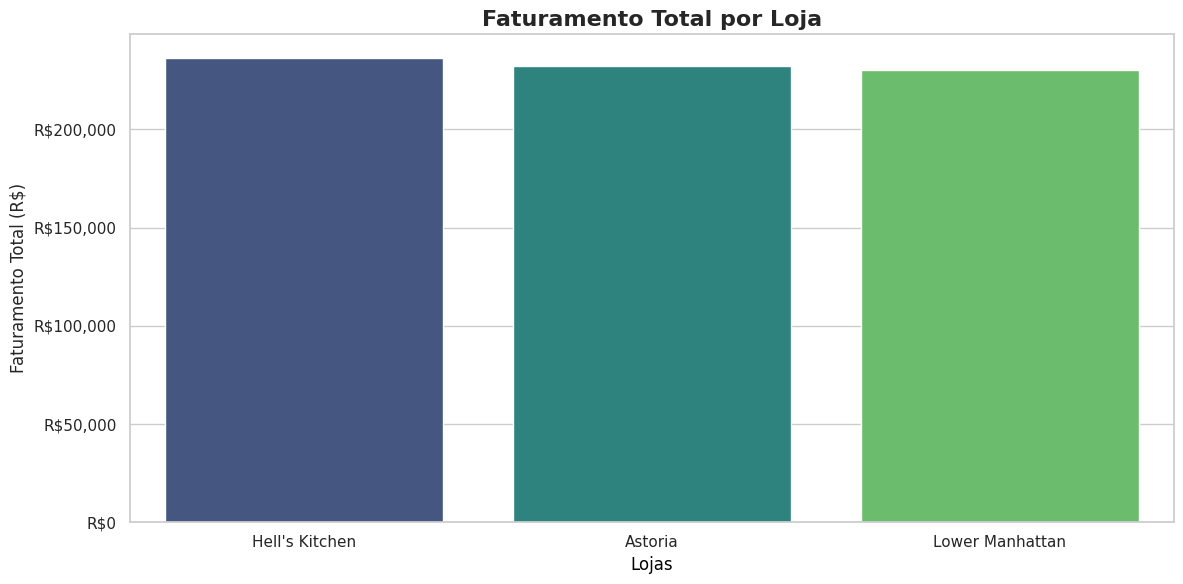

In [29]:
# =============================================
# Gráfico baseado no faturamento total das lojas:
# Astoria, Hell's Kitchen e Lower Manhattan
# =============================================

# Define o estilo visual do gráfico (fundo branco com grade leve)
sns.set(style="whitegrid")

# Cria a figura do gráfico com tamanho de 12x6 polegadas
plt.figure(figsize=(12, 6))

# Cria o gráfico de barras com Seaborn
sns.barplot(
    data=faturamento_total_por_loja,  # DataFrame contendo as colunas 'local_loja' e 'valor_total'
    x='local_loja',                   # Eixo X -> nome das lojas
    y='valor_total',                  # Eixo Y -> valor total do faturamento
    palette='viridis'                 # Paleta de cores (gradiente verde-azulado)
)

# Adiciona o título principal do gráfico
plt.title('Faturamento Total por Loja', fontsize=16, fontweight='bold')

# Adiciona o rótulo do eixo X
plt.xlabel('Lojas', fontsize=12, color='black')

# Adiciona o rótulo do eixo Y
plt.ylabel('Faturamento Total (R$)', fontsize=12)

# Formata os valores do eixo Y para exibir como moeda (R$ e separador de milhar)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('R${x:,.0f}'))

# Ajusta automaticamente o espaçamento dos elementos para evitar sobreposição
plt.tight_layout()

# Exibe o gráfico na tela
plt.show()


# **Faturamento Mensal**

In [30]:
# =============================================
# Preparação e agrupamento de dados de vendas mensais por loja
# =============================================

# Cria uma coluna que representa o ano e o mês da transação (exemplo: 2023-05)
# O método .dt.to_period('M') transforma a data em um período mensal
tabela['ano_mes'] = tabela['data_transacao'].dt.to_period('M')

# Calcula o valor total de cada transação multiplicando a quantidade pelo preço unitário
tabela['valor_total'] = tabela['quantidade_transacao'] * tabela['preco_unitario']

# Agrupa os dados por mês e loja, somando o valor total das vendas
# Isso gera o faturamento mensal de cada loja
vendas_por_mes = (
    tabela
    .groupby(['ano_mes', 'local_loja'])['valor_total']  # agrupa por mês e loja
    .sum()                                              # soma o faturamento
    .reset_index()                                      # converte o resultado de volta para um DataFrame
)

# Ordena os resultados em ordem cronológica de mês
vendas_por_mes = vendas_por_mes.sort_values('ano_mes')

# Exibe a tabela resultante para conferência dos dados
vendas_por_mes


,ano_mes,local_loja,valor_total
0,2023-01,Astoria,27313.66
1,2023-01,Hell's Kitchen,27820.65
2,2023-01,Lower Manhattan,26543.43
3,2023-02,Astoria,25105.34
4,2023-02,Hell's Kitchen,25719.80
5,2023-02,Lower Manhattan,25320.05
6,2023-03,Astoria,32835.43
7,2023-03,Hell's Kitchen,33110.57
8,2023-03,Lower Manhattan,32888.68
9,2023-04,Astoria,39477.61


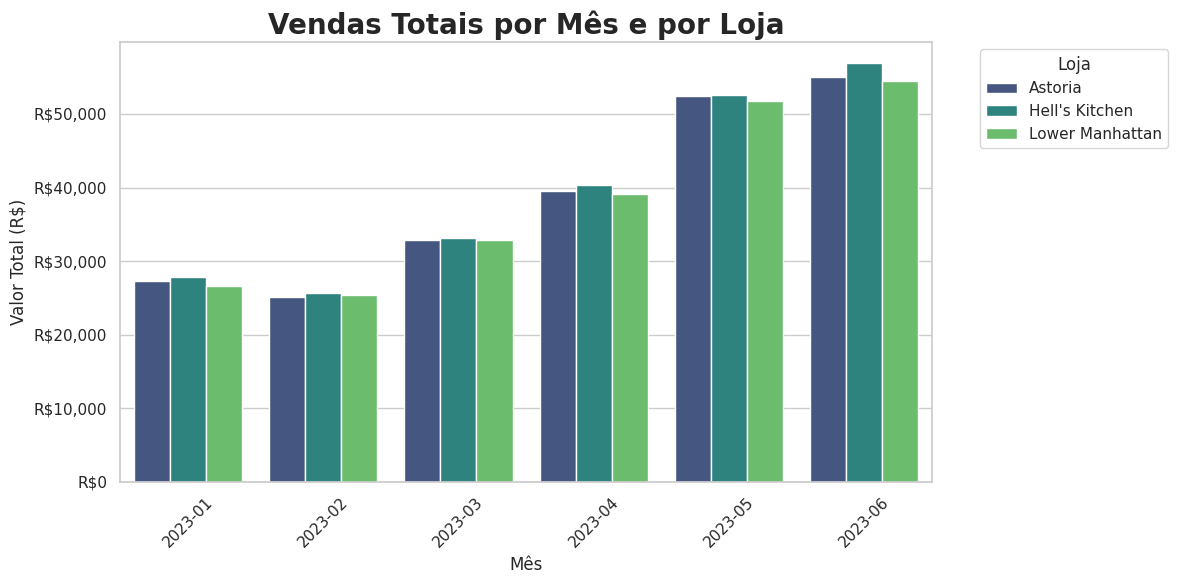

In [31]:
#Grafico das vendas mensais das lojas
sns.set(style="whitegrid")

# Criação do gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
sns.barplot(
    data=vendas_por_mes,
    x='ano_mes',            # eixo X: mês/ano da venda
    y='valor_total',        # eixo Y: soma dos valores de venda
    hue='local_loja',       # diferenciação por loja
    palette='viridis'       # paleta de cores
)

# Título e rótulos dos eixos
plt.title('Vendas Totais por Mês e por Loja', fontsize=20, fontweight='bold')
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Valor Total (R$)', fontsize=12)

# Formata o eixo Y para exibir valores monetários (R$)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('R${x:,.0f}'))

# Ajustes visuais e legenda
plt.legend(title='Loja', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()

# **Comparação da 1º semana de cada mês**

In [32]:
# Cria uma cópia da tabela apenas com as colunas necessárias
df_analise_semana = tabela[['data_transacao', 'local_loja', 'valor_total']].copy()

# 1️⃣ Cria colunas temporais: Ano, Mês e Número da Semana do Ano
df_analise_semana['ano'] = df_analise_semana['data_transacao'].dt.year
df_analise_semana['mes'] = df_analise_semana['data_transacao'].dt.month
df_analise_semana['num_semana_ano'] = (
    df_analise_semana['data_transacao'].dt.isocalendar().week.astype(int)
)

# 2️⃣ Agrupa por MÊS e ANO e encontra o menor número de semana
# (a primeira semana registrada em cada mês)
primeira_semana_por_mes = (
    df_analise_semana
    .groupby(['ano', 'mes'])['num_semana_ano']
    .min()
    .reset_index()
    .rename(columns={'num_semana_ano': 'primeira_semana_do_mes_id'})
)

# 3️⃣ Faz um MERGE para marcar quais transações pertencem à primeira semana de cada mês
df_analise_semana = pd.merge(
    df_analise_semana,
    primeira_semana_por_mes,
    on=['ano', 'mes'],
    how='left'
)

# 4️⃣ Corrige o problema de semanas 52 ou 53 caindo em Janeiro (ajuste de calendário ISO)
df_analise_semana.loc[
    (df_analise_semana['mes'] == 1) &
    (df_analise_semana['primeira_semana_do_mes_id'] >= 52),
    'primeira_semana_do_mes_id'
] = 1

# 5️⃣ Cria uma coluna booleana para identificar se a transação é da 1ª semana do mês
df_analise_semana['is_primeira_semana'] = (
    df_analise_semana['num_semana_ano'] ==
    df_analise_semana['primeira_semana_do_mes_id']
)

# 6️⃣ Calcula o faturamento total da primeira semana de cada mês, por loja
faturamento_1sem_mensal = (
    df_analise_semana[df_analise_semana['is_primeira_semana'] == True]
    .groupby(['ano', 'mes', 'local_loja'])['valor_total']
    .sum()
    .reset_index()
    .rename(columns={'valor_total': 'Faturamento 1ª Semana'})
)

# 7️⃣ Cria uma coluna de identificação visual (ex: 2023-05)
faturamento_1sem_mensal['Ano_Mes'] = (
    faturamento_1sem_mensal['ano'].astype(str) + '-' +
    faturamento_1sem_mensal['mes'].astype(str).str.zfill(2)
)

# Exibe as primeiras linhas da tabela resultante
print("--- Faturamento da Primeira Semana de Cada Mês (por Loja) ---")
display(faturamento_1sem_mensal.head())

--- Faturamento da Primeira Semana de Cada Mês (por Loja) ---


,ano,mes,local_loja,Faturamento 1ª Semana,Ano_Mes
0,2023,1,Astoria,5856.05,2023-01
1,2023,1,Hell's Kitchen,5895.73,2023-01
2,2023,1,Lower Manhattan,5387.55,2023-01
3,2023,2,Astoria,4415.90,2023-02
4,2023,2,Hell's Kitchen,4183.35,2023-02


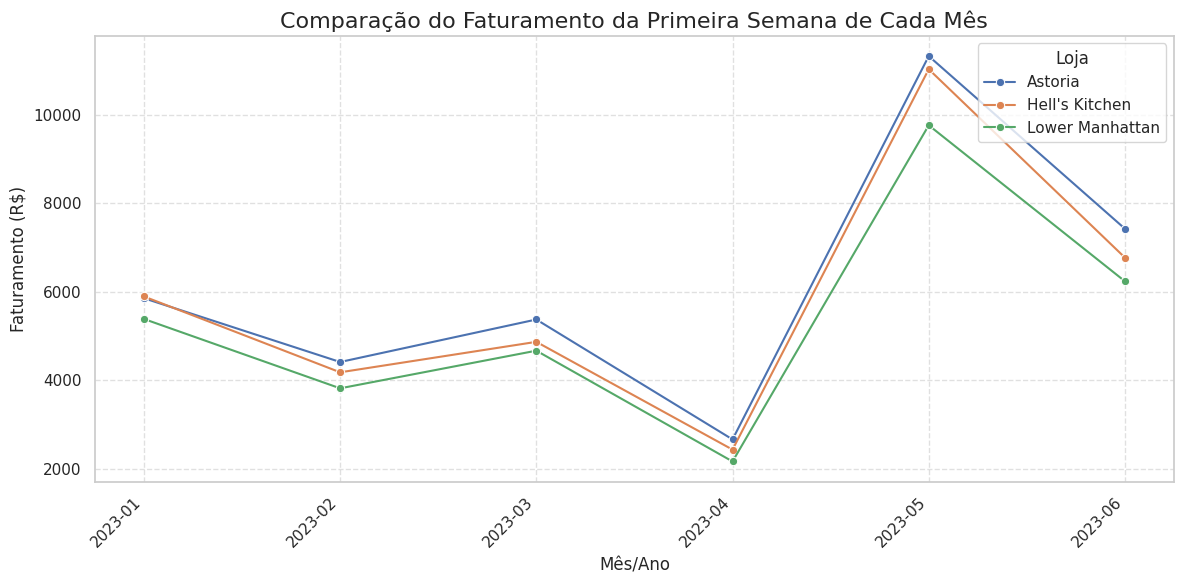

In [36]:
# =============================================
# GRÁFICO: Faturamento da Primeira Semana de Cada Mês
# =============================================

# Define o tamanho da figura
plt.figure(figsize=(12, 6))

# Cria o gráfico de linhas comparando o faturamento entre as lojas
sns.lineplot(
    data=faturamento_1sem_mensal,         # DataFrame com os dados
    x='Ano_Mes',                          # Eixo X -> Mês/Ano
    y='Faturamento 1ª Semana',            # Eixo Y -> Valor do faturamento
    hue='local_loja',                     # Diferencia as lojas por cor
    marker='o'                            # Marca cada ponto no gráfico
)

# Configurações visuais do gráfico
plt.title('Comparação do Faturamento da Primeira Semana de Cada Mês', fontsize=16)
plt.xlabel('Mês/Ano', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)
plt.xticks(rotation=45, ha='right')       # Rotaciona rótulos do eixo X para melhor leitura
plt.grid(True, linestyle='--', alpha=0.6) # Adiciona grade leve
plt.legend(title='Loja', loc='upper right')
plt.tight_layout()                        # Ajusta margens automaticamente

# Exibe o gráfico
plt.show()


# **Distribuição de Vendas Global**

In [37]:
# =============================================
# AGRUPAMENTO DE VENDAS POR CATEGORIA DE PRODUTO
# Objetivo: Somar a quantidade total vendida de cada categoria
# =============================================

# Realiza um agrupamento entre as colunas 'categoria_produto' e 'quantidade_transacao'
# para calcular o total de vendas (quantidade) de cada tipo de produto
tabela_grafico_tabela = (
    tabela
    .groupby(['categoria_produto'])['quantidade_transacao']
    .sum()  # Soma todas as quantidades vendidas por categoria
)

# Exibe o resultado final do agrupamento
# (cada linha representa uma categoria de produto e seu total vendido)
tabela_grafico_tabela


,quantidade_transacao
categoria_produto,
Café,89250
Chocolate Embalado,487
Chocolate Quente,17457
Chá,69737
Chá Solto,1210
Grãos de Café,1828
Marca Própria,776
Padaria,23214
Sabores / Xaropes,10511


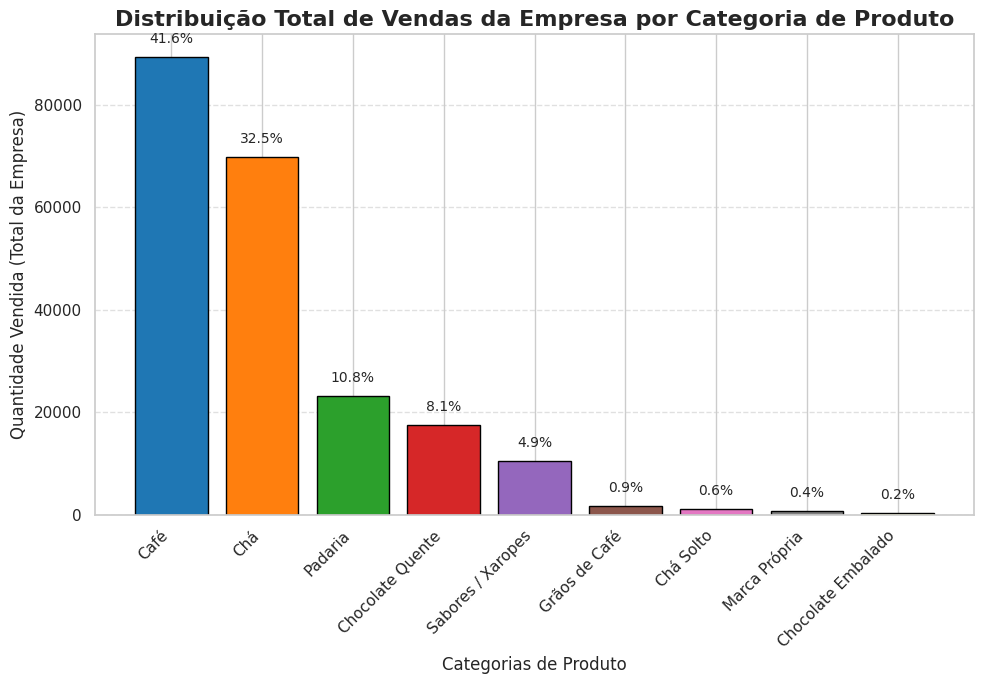

In [41]:
# =============================================
# GRÁFICO DE BARRAS: Distribuição Total de Vendas da Empresa por Categoria
# =============================================

# Ordena as categorias do maior para o menor volume de vendas
tabela_ordenada = tabela_grafico_tabela.sort_values(ascending=False)

# Extrai nomes das categorias (rótulos) e as quantidades vendidas
categorias = tabela_ordenada.index
valores = tabela_ordenada.values

# Define a paleta de cores com base no número de categorias
colors = plt.cm.tab10.colors[:len(categorias)]

# Cria a figura e o eixo do gráfico
fig, ax = plt.subplots(figsize=(10, 7))

# Cria o gráfico de barras
barras = ax.bar(
    categorias,     # Eixo X -> categorias de produto
    valores,        # Eixo Y -> quantidade total vendida
    color=colors,   # Cores das barras
    edgecolor='black'
)

# Calcula o total de vendas para gerar as porcentagens
total = valores.sum()

# Adiciona o valor percentual acima de cada barra
for barra, valor in zip(barras, valores):
    ax.text(
        barra.get_x() + barra.get_width() / 2,   # Posição central da barra
        barra.get_height() + total * 0.01,       # Texto um pouco acima da barra
        f"{valor/total:.1%}",                    # Exibe a porcentagem sobre o total
        ha='center', va='bottom', fontsize=10
    )

# Título e rótulos dos eixos
plt.title("Distribuição Total de Vendas da Empresa por Categoria de Produto", fontsize=16, fontweight='bold')
plt.xlabel("Categorias de Produto", fontsize=12)
plt.ylabel("Quantidade Vendida (Total da Empresa)", fontsize=12)

# Rotaciona os nomes das categorias para melhor visualização
plt.xticks(rotation=45, ha='right')

# Adiciona grade leve e organiza layout
plt.grid(True, linestyle='--', alpha=0.6, axis='y')
plt.tight_layout()

# Exibe o gráfico final
plt.show()


# **Produtos Vendidos em Cada Loja**

In [42]:
# =============================================
# AGRUPAMENTO DE VENDAS POR LOJA E CATEGORIA DE PRODUTO
# Objetivo: Calcular o faturamento total de cada categoria em cada loja
# =============================================

# Agrupa a tabela original por 'local_loja' e 'categoria_produto'
# e soma o valor total das transações de cada combinação
transacoes_por_cidade_produto = (
    tabela
    .groupby(['local_loja', 'categoria_produto'])['valor_total']  # agrupa por loja e categoria
    .sum()                                                        # soma o faturamento de cada grupo
    .unstack(fill_value=0)                                        # transforma as categorias em colunas
)

# Exibe a tabela resultante
# Linhas = lojas | Colunas = categorias de produto | Valores = faturamento total (R$)
print(transacoes_por_cidade_produto)


categoria_produto      Café  Chocolate Embalado  Chocolate Quente       Chá  \
local_loja                                                                    
Astoria            89744.30             1089.71          26335.25  67839.90   
Hell's Kitchen     91222.65             1698.77          23586.25  64701.30   
Lower Manhattan    88985.50             1619.16          22494.50  63864.75   

categoria_produto  Chá Solto  Grãos de Café  Marca Própria   Padaria  \
local_loja                                                             
Astoria              3194.00       10219.20         5457.0  26599.75   
Hell's Kitchen       4461.35       18635.10         1942.0  27386.95   
Lower Manhattan      3558.25       11230.95         6208.0  28328.94   

categoria_produto  Sabores / Xaropes  
local_loja                            
Astoria                       1764.8  
Hell's Kitchen                2876.8  
Lower Manhattan               3767.2  


In [10]:
# =============================================
# CÁLCULO DE PERCENTUAL DE VENDAS POR CATEGORIA (POR LOJA)
# Objetivo: Mostrar o peso (%) de cada categoria dentro de cada loja
# =============================================

# Divide cada valor da tabela 'transacoes_por_cidade_produto'
# pelo total de vendas da respectiva loja (soma das colunas da linha)
# O resultado é multiplicado por 100 para obter a porcentagem (%)
transacoes_por_cidade_produto_pct = (
    transacoes_por_cidade_produto.div(
        transacoes_por_cidade_produto.sum(axis=1),  # soma total de cada loja
        axis=0                                      # divide linha por linha
    ) * 100                                         # converte em porcentagem
)

# Exibe a nova tabela com valores percentuais
# Cada linha = loja / Cada coluna = categoria / Valor = % do total da loja
print(transacoes_por_cidade_produto_pct)


categoria_produto       Café  Chocolate Embalado  Chocolate Quente        Chá  \
local_loja                                                                      
Astoria            38.642262            0.469209         11.339479  29.210626   
Hell's Kitchen     38.570123            0.718262          9.972573  27.356551   
Lower Manhattan    38.679720            0.703807          9.777784  27.760373   

categoria_produto  Chá Solto  Grãos de Café  Marca Própria    Padaria  \
local_loja                                                              
Astoria             1.375278       4.400201       2.349685  11.453368   
Hell's Kitchen      1.886317       7.879163       0.821103  11.579559   
Lower Manhattan     1.546680       4.881807       2.698459  12.313865   

categoria_produto  Sabores / Xaropes  
local_loja                            
Astoria                     0.759891  
Hell's Kitchen              1.216348  
Lower Manhattan             1.637505  


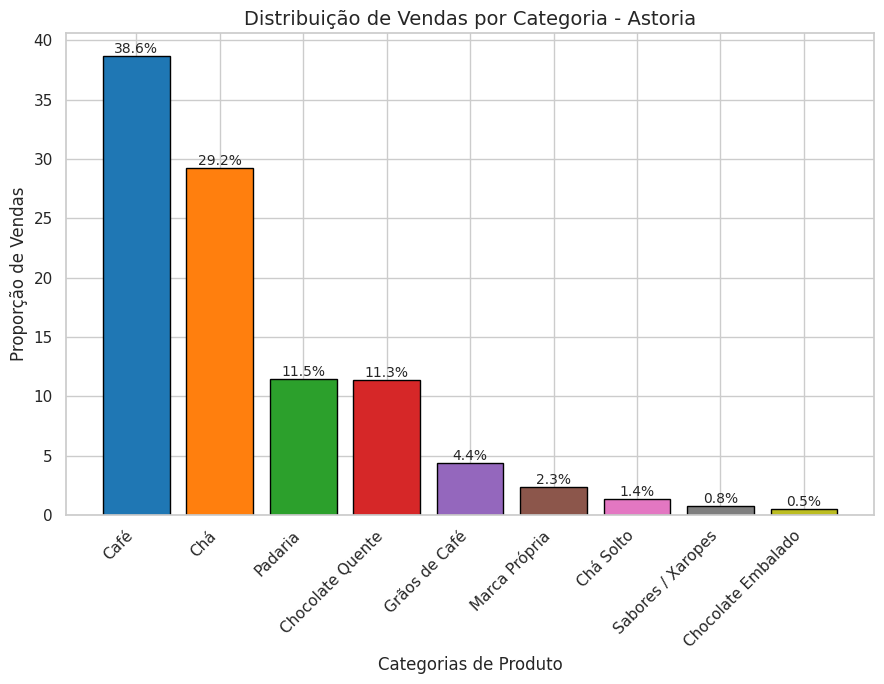

In [44]:
# --- Gráfico de barras: Distribuição percentual de vendas por categoria na loja Astoria ---

# Seleciona apenas a linha referente à loja "Astoria" do DataFrame de porcentagens
# (transacoes_por_cidade_produto_pct foi calculado anteriormente)
loja_astoria = transacoes_por_cidade_produto_pct.loc['Astoria']

# Ordena as categorias em ordem decrescente (da mais vendida para a menos vendida)
loja_astoria = loja_astoria.sort_values(ascending=False)

# Define uma paleta de cores usando o colormap 'tab10' (10 cores padrão do Matplotlib)
colors = plt.cm.tab10.colors[:len(loja_astoria)]

# Cria a figura e o eixo do gráfico, definindo o tamanho da área de exibição
fig, ax = plt.subplots(figsize=(9, 7))

# Cria o gráfico de barras com as categorias e seus respectivos valores percentuais
barras = ax.bar(
    loja_astoria.index,    # eixo X → categorias de produto
    loja_astoria.values,   # eixo Y → porcentagem de vendas
    color=colors,          # cores das barras
    edgecolor='black'      # borda preta para melhor visualização
)

# Adiciona o valor percentual acima de cada barra (rótulo de texto)
total = loja_astoria.sum()   # soma total (deve ser 100%)
for barra, valor in zip(barras, loja_astoria):
    ax.text(
        barra.get_x() + barra.get_width() / 2,  # posição X central da barra
        barra.get_height() + 0.005,             # posição Y um pouco acima da barra
        f"{valor/total:.1%}",                   # formata como porcentagem (ex: 23.5%)
        ha='center',                            # centraliza o texto horizontalmente
        va='bottom',                            # posiciona o texto acima da barra
        fontsize=10                             # tamanho da fonte
    )

# Define o título e os rótulos dos eixos
plt.title("Distribuição de Vendas por Categoria - Astoria", fontsize=14)
plt.xlabel("Categorias de Produto", fontsize=12)
plt.ylabel("Proporção de Vendas", fontsize=12)

# Rotaciona os nomes das categorias no eixo X para melhor leitura
plt.xticks(rotation=45, ha='right')

# Ajusta automaticamente o layout para evitar sobreposição de textos
plt.tight_layout()

# Exibe o gráfico
plt.show()


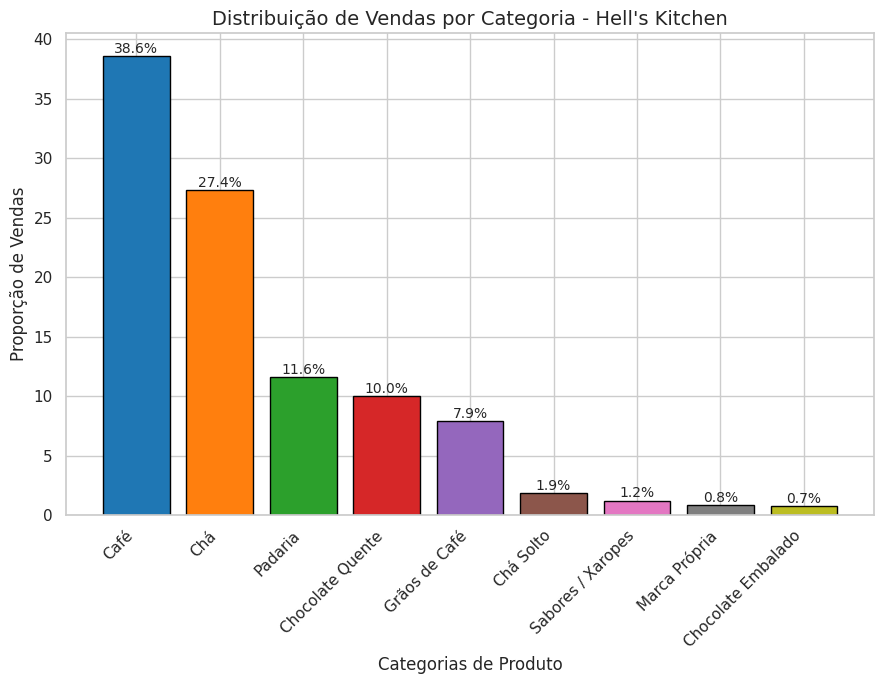

In [45]:
# --- Gráfico de barras: Distribuição percentual de vendas por categoria na loja Hell's Kitchen ---

# Seleciona apenas os dados da loja "Hell's Kitchen" do DataFrame de porcentagens
# (gerado anteriormente com transacoes_por_cidade_produto_pct)
loja_hells = transacoes_por_cidade_produto_pct.loc["Hell's Kitchen"]

# Ordena as categorias da mais vendida para a menos vendida (ordem decrescente)
loja_hells = loja_hells.sort_values(ascending=False)

# Define uma paleta de cores, limitando a quantidade conforme o número de categorias
colors = plt.cm.tab10.colors[:len(loja_hells)]

# Cria a figura e os eixos do gráfico, definindo o tamanho da área de exibição
fig, ax = plt.subplots(figsize=(9, 7))

# Cria o gráfico de barras
barras = ax.bar(
    loja_hells.index,    # eixo X → categorias de produto
    loja_hells.values,   # eixo Y → porcentagem de vendas
    color=colors,        # cores das barras
    edgecolor='black'    # borda preta para destacar as barras
)

# Calcula o total (que deve ser 100%) e adiciona as porcentagens acima das barras
total = loja_hells.sum()
for barra, valor in zip(barras, loja_hells):
    ax.text(
        barra.get_x() + barra.get_width() / 2,   # posição X central da barra
        barra.get_height() + 0.005,              # posição Y um pouco acima da barra
        f"{valor/total:.1%}",                    # exibe o valor como porcentagem (ex: 12.5%)
        ha='center',                             # centraliza o texto horizontalmente
        va='bottom',                             # alinha o texto na parte inferior
        fontsize=10                              # tamanho da fonte
    )

# Define título e rótulos dos eixos
plt.title("Distribuição de Vendas por Categoria - Hell's Kitchen", fontsize=14)
plt.xlabel("Categorias de Produto", fontsize=12)
plt.ylabel("Proporção de Vendas", fontsize=12)

# Rotaciona os nomes das categorias no eixo X para melhor visualização
plt.xticks(rotation=45, ha='right')

# Ajusta automaticamente o layout para evitar sobreposição
plt.tight_layout()

# Exibe o gráfico
plt.show()


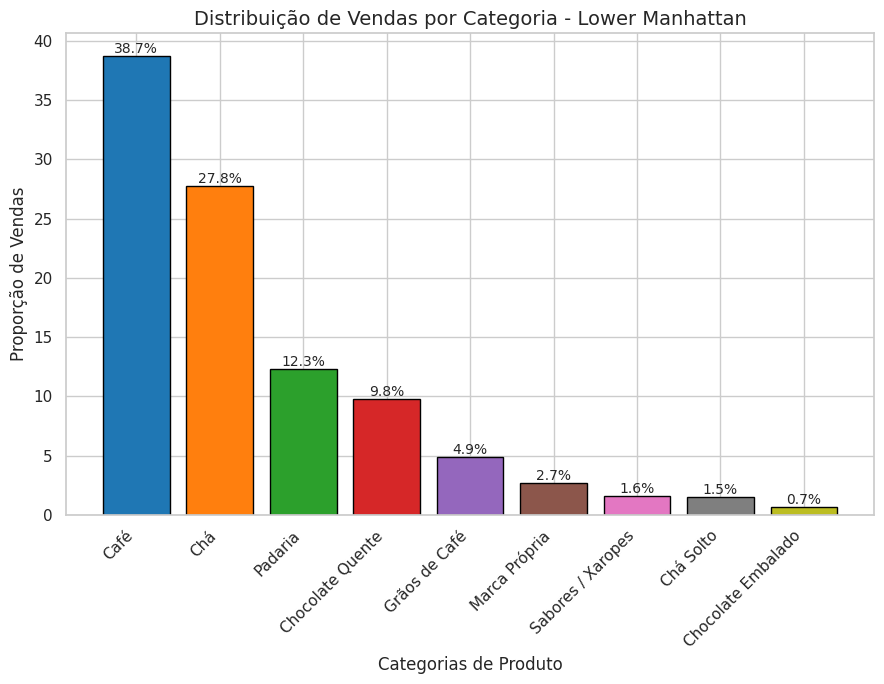

In [46]:
# --- Gráfico de barras verticais: Distribuição percentual de vendas por categoria na loja Lower Manhattan ---

# Seleciona apenas os dados referentes à loja "Lower Manhattan"
# do DataFrame que contém as porcentagens de venda por categoria e loja.
loja_lower = transacoes_por_cidade_produto_pct.loc['Lower Manhattan']

# Ordena as categorias da mais vendida para a menos vendida (em ordem decrescente)
loja_lower = loja_lower.sort_values(ascending=False)

# Define a paleta de cores (mesmo padrão usado nos outros gráficos)
colors = plt.cm.tab10.colors[:len(loja_lower)]

# Cria a figura e os eixos do gráfico, com tamanho definido
fig, ax = plt.subplots(figsize=(9, 7))

# Criação do gráfico de barras verticais
barras = ax.bar(
    loja_lower.index,    # eixo X → categorias de produto
    loja_lower.values,   # eixo Y → porcentagem de vendas
    color=colors,        # cores das barras
    edgecolor='black'    # contorno preto para destacar as barras
)

# Calcula o total das porcentagens (deve ser próximo de 100%)
total = loja_lower.sum()

# Adiciona o valor percentual acima de cada barra
for barra, valor in zip(barras, loja_lower.values):
    ax.text(
        barra.get_x() + barra.get_width() / 2,   # posição X centralizada na barra
        barra.get_height() + 0.005,              # posição Y um pouco acima da barra
        f"{valor/total:.1%}",                    # texto exibindo a porcentagem (ex: "15.3%")
        ha='center',                             # alinhamento horizontal centralizado
        va='bottom',                             # alinhamento vertical na base inferior do texto
        fontsize=10                              # tamanho da fonte
    )

# Configurações visuais do gráfico
plt.title("Distribuição de Vendas por Categoria - Lower Manhattan", fontsize=14)  # título do gráfico
plt.xlabel("Categorias de Produto", fontsize=12)  # rótulo do eixo X
plt.ylabel("Proporção de Vendas", fontsize=12)    # rótulo do eixo Y
plt.xticks(rotation=45, ha='right')               # rotaciona os nomes das categorias para melhor leitura
plt.tight_layout()                                # ajusta o espaçamento do layout para não cortar nada
plt.show()                                        # exibe o gráfico na tela


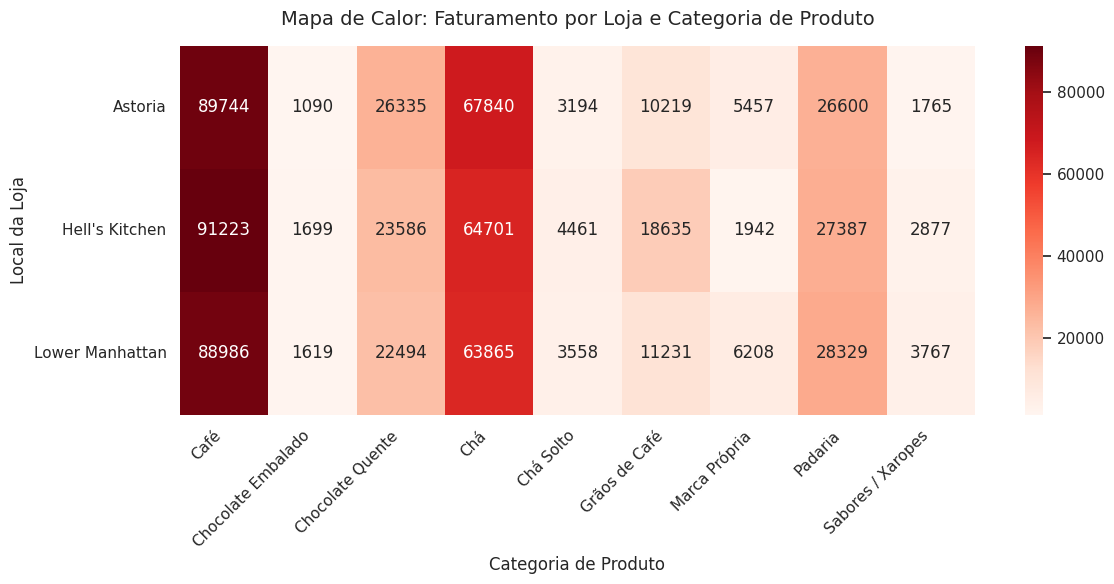

In [47]:
# --- Gráfico de Calor: Faturamento total por loja e categoria de produto ---

# Define o tamanho da figura do gráfico (largura x altura)
plt.figure(figsize=(12, 6))

# Cria o mapa de calor (heatmap) com os dados de faturamento total
sns.heatmap(
    transacoes_por_cidade_produto,  # DataFrame com os valores de faturamento por loja e categoria
    cmap='Reds',                    # Paleta de cores em tons de vermelho (mais escuro = maior valor)
    annot=True,                     # Mostra os valores numéricos dentro de cada célula
    fmt='.0f'                       # Formata os números como float sem casas decimais
)

# Adiciona o título principal do gráfico
plt.title(
    'Mapa de Calor: Faturamento por Loja e Categoria de Produto',
    fontsize=14,
    pad=15  # espaçamento entre o título e o gráfico
)

# Define os rótulos dos eixos
plt.xlabel('Categoria de Produto', fontsize=12)
plt.ylabel('Local da Loja', fontsize=12)

# Ajusta a rotação dos nomes no eixo X (categorias) para melhor leitura
plt.xticks(rotation=45, ha='right')

# Mantém os nomes das lojas (eixo Y) na horizontal
plt.yticks(rotation=0)

# Ajusta automaticamente o espaçamento dos elementos da figura
plt.tight_layout()

# Exibe o gráfico final na tela
plt.show()


# **Gasto Médio de Cliente**

In [49]:
# --- Cálculo do Ticket Médio (valor médio das vendas) entre as 3 lojas ---

# Verifica se a coluna 'valor_total' existe na tabela
# (caso não tenha sido criada anteriormente)
if 'valor_total' not in tabela.columns:
    # Cria a coluna 'valor_total' multiplicando a quantidade vendida pelo preço unitário
    tabela['valor_total'] = tabela['quantidade_transacao'] * tabela['preco_unitario']

# Agrupa as transações por loja e calcula a média do valor total das vendas
ticket_medio_por_loja = (
    tabela.groupby('local_loja')['valor_total']  # agrupa por loja
    .mean()                                     # calcula a média dos valores totais
    .reset_index()                              # transforma o resultado em um novo DataFrame
    .rename(columns={'valor_total': 'Ticket Médio (R$)'})  # renomeia a coluna para deixar mais descritivo
)
ticket_medio_por_loja


,local_loja,Ticket Médio (R$)
0,Astoria,4.589891
1,Hell's Kitchen,4.661696
2,Lower Manhattan,4.814726


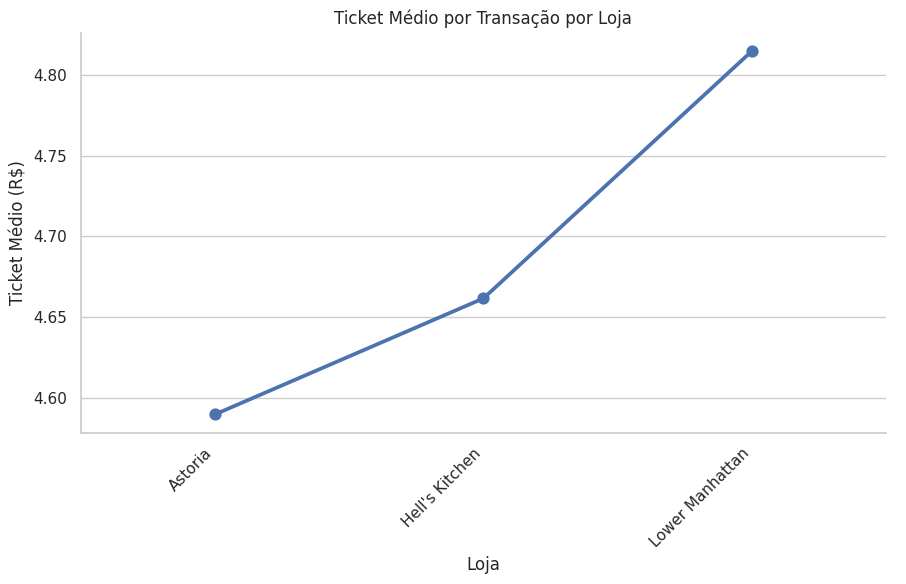

In [51]:
# --- Gráfico de Pontos: Ticket Médio por Transação em Cada Loja ---

# Cria um gráfico categórico (catplot) do tipo "point"
sns.catplot(
    data=ticket_medio_por_loja,   # DataFrame com as médias calculadas por loja
    x="local_loja",               # eixo X → nome das lojas
    y="Ticket Médio (R$)",        # eixo Y → valor médio gasto por transação
    kind="point",                 # tipo do gráfico: ponto conectado por linhas (point plot)
    height=6,                     # altura da figura
    aspect=1.5                    # proporção largura/altura (deixa mais horizontal)
)

# Rotaciona os nomes das lojas no eixo X para melhor leitura
plt.xticks(rotation=45, ha='right')

# Define o rótulo do eixo Y
plt.ylabel('Ticket Médio (R$)')

# Define o rótulo do eixo X
plt.xlabel('Loja')

# Título principal do gráfico
plt.title('Ticket Médio por Transação por Loja')

# Ajusta o layout para evitar sobreposição de elementos
plt.tight_layout()

# Exibe o gráfico na tela
plt.show()


pegar a 1 semana de cada mês e comparar os dias vendidos das três lojas


Tirar duvias com o professor

teste

# **Horario de Pico**

In [52]:
#Criando outro DataFrame
tabela_ops = tabela.copy()

array(['07:06:11', '07:08:56', '07:14:04', '07:20:24', '07:22:41',
       '07:25:49', '07:33:34', '07:39:13', '07:39:34', '07:43:05',
       '07:44:35', '07:45:51', '07:48:19', '07:52:36', '07:59:58',
       '08:00:18', '08:00:39', '08:11:45', '08:17:27', '08:24:26',
       '08:29:38', '08:31:23', '08:33:08', '08:35:03', '08:41:57',
       '08:52:03', '08:52:32', '08:54:33', '08:56:27', '08:57:46',
       '08:58:55', '09:00:12', '09:00:24', '09:07:13', '09:08:09',
       '09:08:13', '09:10:30', '09:11:06', '09:13:01', '09:13:15',
       '09:14:16', '09:14:17', '09:14:25', '09:14:41', '09:15:09',
       '09:15:13', '09:19:21', '09:19:26', '09:21:08', '09:22:17'],
      dtype=object)

In [69]:
# Conversão da coluna 'hora_transacao' para o tipo datetime.
# Essa etapa é essencial para permitir o uso de operações de extração de componentes de data e hora,
# como a identificação do horário em que cada transação ocorreu.
tabela_ops['hora_transacao'] = pd.to_datetime(tabela_ops['hora_transacao'])

# Criação de uma nova coluna chamada 'horas', contendo apenas a hora (0 a 23) de cada transação.
# Essa coluna facilita a análise do comportamento das vendas ao longo do dia.
tabela_ops['horas'] = tabela_ops['hora_transacao'].dt.hour

# Contagem do número de transações realizadas em cada hora do dia.
# O método value_counts() realiza a contagem, e sort_index() ordena os resultados por hora (de 0 a 23).
horario_pico = tabela_ops['horas'].value_counts().sort_index()

# Armazena novamente a contagem de transações por hora para uso em visualizações (como gráficos de barras).
# Essa informação ajuda a identificar o horário de maior volume de operações.
transacoes_por_hora = tabela_ops['horas'].value_counts().sort_index()

# Cálculo do faturamento total agrupado por hora do dia.
# O método groupby() agrupa as transações conforme o valor da coluna 'horas',
# e sum() soma o valor total de vendas ('valor_total') em cada grupo.
faturamento_por_hora = tabela_ops.groupby('horas')['valor_total'].sum()

# Exibição do resultado no console para identificação do horário de pico de movimentação.
# Aqui, o horário de maior número de transações pode ser observado diretamente.
print(f"O horário de pico é: {horario_pico}h")



O horário de pico é: horas
6      4594
7     13428
8     17654
9     17764
10    18545
11     9766
12     8708
13     8714
14     8933
15     8979
16     9093
17     8745
18     7498
19     6092
20      603
Name: count, dtype: int64h


/tmp/ipython-input-536392133.py:26: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


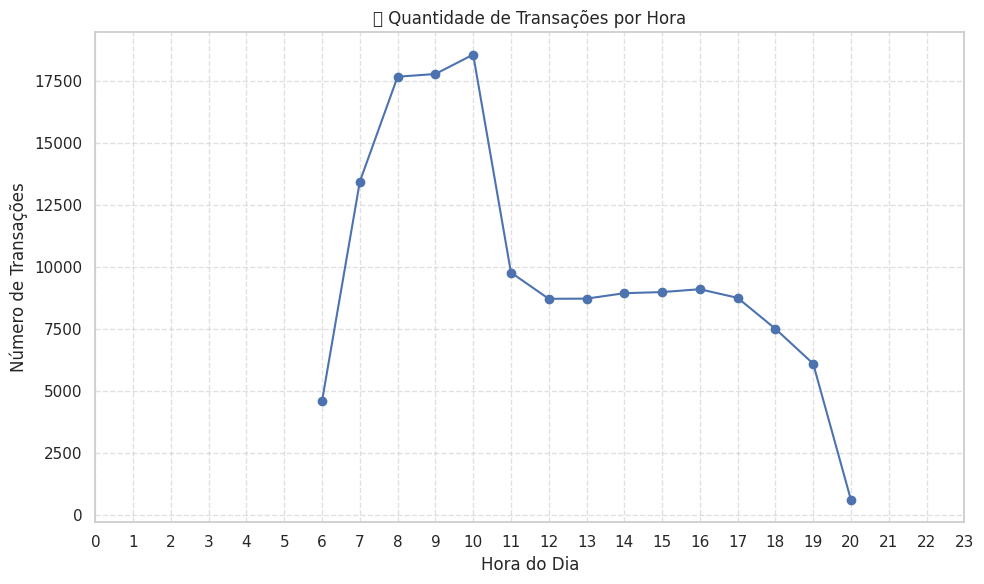

In [70]:
# --- Gráfico Transações por Hora ---
# Criação de uma figura com tamanho definido (10x6 polegadas) para melhor visualização do gráfico.
plt.figure(figsize=(10, 6))

# Geração de um gráfico de linha (line plot) a partir da variável 'transacoes_por_hora',
# que contém a contagem de transações agrupadas por hora do dia.
# O parâmetro 'marker="o"' adiciona marcadores nos pontos, facilitando a leitura visual.
transacoes_por_hora.plot(kind='line', marker='o')

# Definição do título do gráfico, descrevendo claramente o que está sendo exibido.
plt.title('📈 Quantidade de Transações por Hora')

# Nomeação do eixo X (horizontal) indicando que representa as horas do dia (0 a 23).
plt.xlabel('Hora do Dia')

# Nomeação do eixo Y (vertical) indicando que mostra o número total de transações.
plt.ylabel('Número de Transações')

# Configuração dos rótulos do eixo X, exibindo todas as horas de 0 a 23.
plt.xticks(range(0, 24))

# Adição de uma grade de fundo pontilhada para facilitar a leitura dos valores.
plt.grid(True, linestyle='--', alpha=0.6)

# Ajuste automático do layout para evitar sobreposição de textos ou elementos do gráfico.
plt.tight_layout()

# Exibição final do gráfico na tela.
plt.show()


/tmp/ipython-input-60626897.py:27: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


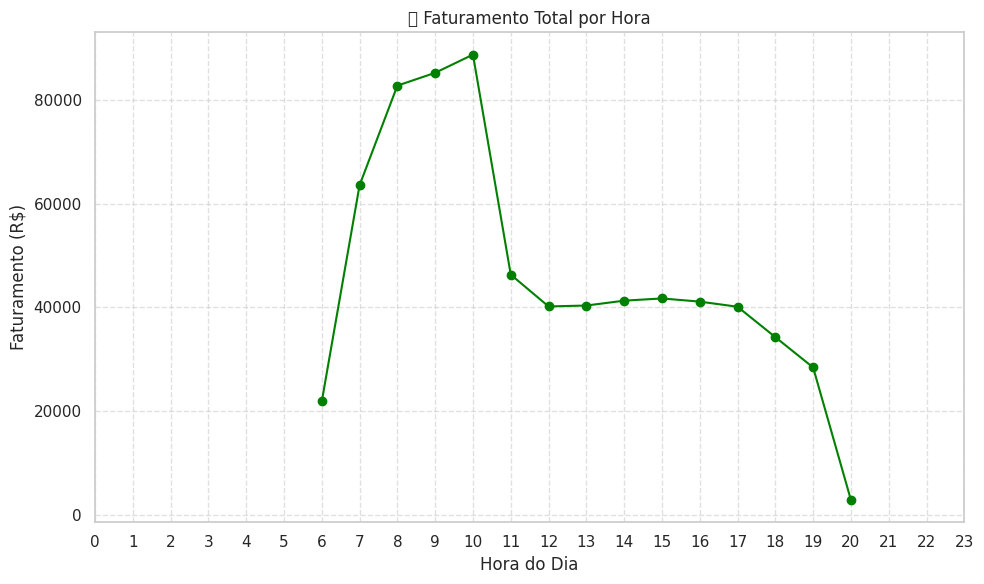

In [71]:
# --- Gráfico de Faturamento Total por Hora ---
# Criação de uma figura com tamanho 10x6 polegadas para garantir boa visualização do gráfico.
plt.figure(figsize=(10, 6))

# Geração do gráfico de linha a partir da variável 'faturamento_por_hora',
# que contém a soma total dos valores faturados agrupados por hora do dia.
# O parâmetro 'color="green"' define a cor verde para a linha, diferenciando-o de outros gráficos.
# O 'marker="o"' adiciona marcadores circulares em cada ponto do gráfico.
faturamento_por_hora.plot(kind='line', marker='o', color='green')

# Título do gráfico, indicando claramente que se trata do faturamento total por hora.
plt.title('💵 Faturamento Total por Hora')

# Nomeação do eixo X (horizontal), representando as horas do dia (de 0 a 23).
plt.xlabel('Hora do Dia')

# Nomeação do eixo Y (vertical), representando o valor total faturado em reais.
plt.ylabel('Faturamento (R$)')

# Configuração dos rótulos do eixo X para mostrar todas as horas do dia.
plt.xticks(range(0, 24))

# Adição de uma grade pontilhada para facilitar a leitura dos pontos e tendências do gráfico.
plt.grid(True, linestyle='--', alpha=0.6)

# Ajuste automático do layout para evitar sobreposição de rótulos e margens.
plt.tight_layout()

# Exibição final do gráfico.
plt.show()


In [66]:
tabela_ops['hora_transacao'].head(10)


,hora_transacao
0,2025-11-03 07:06:11
1,2025-11-03 07:08:56
2,2025-11-03 07:14:04
3,2025-11-03 07:20:24
4,2025-11-03 07:22:41
5,2025-11-03 07:22:41
6,2025-11-03 07:25:49
7,2025-11-03 07:33:34
8,2025-11-03 07:39:13
9,2025-11-03 07:39:34
